In [1]:
import warnings
warnings.filterwarnings("ignore")

# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os 
os.chdir(r"C:\Users\Komal\Desktop\ML") #Location Path my laptop

In [3]:
data=pd.read_csv("fake.csv")
data

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [4]:
data=pd.DataFrame(data.text)
data


,text
0,Donald Trump just couldn t wish all Americans ...
1,House Intelligence Committee Chairman Devin Nu...
2,"On Friday, it was revealed that former Milwauk..."
3,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis used his annual Christmas Day mes...
...,...
23476,21st Century Wire says As 21WIRE reported earl...
23477,21st Century Wire says It s a familiar theme. ...
23478,Patrick Henningsen 21st Century WireRemember ...
23479,21st Century Wire says Al Jazeera America will...


# Data Cleaning or Pre-Processing

In [5]:
data.iloc[2000,0]  # [row index , column index ]

'No matter what Donald Trump does or where he goes, he s never actually doing the right thing and fulfilling his duties as POTUS.One might think that after suffering such a monstrous fail with his American Health Care Act, the president might double down and get right back to work on his quest to somehow  improve  Obamacare, which he insists is awful despite the fact the Americans overwhelmingly approve of it. But no   instead, Trump decided to spend his Saturday the way he s spent pretty much every Saturday since he became president   by playing golf.In the short 9 weeks of his presidency, Trump has already gone golfing 12 times   which is far more than any of his predecessors and former President Barack Obama, whom Trump once criticized for taking any downtime to play golf. Trump has been getting blasted for his weekend golfing getaways, and the White House has gone to great lengths to hide it:However, Trump s cover was blown when some Instagram photographs of Trump surfaced, reveali

# Data Cleaning or Pre-Processing


# Step 1 :- Lower case

In [6]:
data.text=data.text.str.lower()

In [7]:
data.iloc[2000,0]

'no matter what donald trump does or where he goes, he s never actually doing the right thing and fulfilling his duties as potus.one might think that after suffering such a monstrous fail with his american health care act, the president might double down and get right back to work on his quest to somehow  improve  obamacare, which he insists is awful despite the fact the americans overwhelmingly approve of it. but no   instead, trump decided to spend his saturday the way he s spent pretty much every saturday since he became president   by playing golf.in the short 9 weeks of his presidency, trump has already gone golfing 12 times   which is far more than any of his predecessors and former president barack obama, whom trump once criticized for taking any downtime to play golf. trump has been getting blasted for his weekend golfing getaways, and the white house has gone to great lengths to hide it:however, trump s cover was blown when some instagram photographs of trump surfaced, reveali

# Remove url


* \S == Returns a match where the string DOES NOT contain a white space character ( http / www.)
* (+) == one or more occurance

In [8]:
data.text = data.text.str.replace(r'http\S+|www.\S+','',case=False)
data.iloc[2000,0]

'no matter what donald trump does or where he goes, he s never actually doing the right thing and fulfilling his duties as potus.one might think that after suffering such a monstrous fail with his american health care act, the president might double down and get right back to work on his quest to somehow  improve  obamacare, which he insists is awful despite the fact the americans overwhelmingly approve of it. but no   instead, trump decided to spend his saturday the way he s spent pretty much every saturday since he became president   by playing golf.in the short 9 weeks of his presidency, trump has already gone golfing 12 times   which is far more than any of his predecessors and former president barack obama, whom trump once criticized for taking any downtime to play golf. trump has been getting blasted for his weekend golfing getaways, and the white house has gone to great lengths to hide it:however, trump s cover was blown when some instagram photographs of trump surfaced, reveali

# Step 2 :- Punctuation


In [9]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
def remove_punctuation(abc):
    text_nopunt="".join([c  
                         for c in abc  
                         if c not in string.punctuation])
    return text_nopunt

In [11]:
data.iloc[2000,0]

'no matter what donald trump does or where he goes, he s never actually doing the right thing and fulfilling his duties as potus.one might think that after suffering such a monstrous fail with his american health care act, the president might double down and get right back to work on his quest to somehow  improve  obamacare, which he insists is awful despite the fact the americans overwhelmingly approve of it. but no   instead, trump decided to spend his saturday the way he s spent pretty much every saturday since he became president   by playing golf.in the short 9 weeks of his presidency, trump has already gone golfing 12 times   which is far more than any of his predecessors and former president barack obama, whom trump once criticized for taking any downtime to play golf. trump has been getting blasted for his weekend golfing getaways, and the white house has gone to great lengths to hide it:however, trump s cover was blown when some instagram photographs of trump surfaced, reveali

In [12]:
data.text=data.text.apply(lambda x : remove_punctuation(x))  # x = Text 

In [13]:
data.iloc[2000,0]

'no matter what donald trump does or where he goes he s never actually doing the right thing and fulfilling his duties as potusone might think that after suffering such a monstrous fail with his american health care act the president might double down and get right back to work on his quest to somehow  improve  obamacare which he insists is awful despite the fact the americans overwhelmingly approve of it but no   instead trump decided to spend his saturday the way he s spent pretty much every saturday since he became president   by playing golfin the short 9 weeks of his presidency trump has already gone golfing 12 times   which is far more than any of his predecessors and former president barack obama whom trump once criticized for taking any downtime to play golf trump has been getting blasted for his weekend golfing getaways and the white house has gone to great lengths to hide ithowever trump s cover was blown when some instagram photographs of trump surfaced revealing to american

# Remove Number

In [14]:
data.iloc[100,0]

'former vice president joe biden was asked on monday by matt lauer on nbc s  today  to name something specific that donald trump has been  doing well well that seems like a trick question since trump has passed no major legislation and reaches across the aisle only to take shots at democrats in his twitter timeline during his morning ragetweets so biden struggled to find something anything that trump has done well since taking office i think there s a number of things he s doing well but even the things he s doing well it s how he does them  biden said it s more the tone of this administration that bothers me  he continued with all due respect you haven t come up with one thing you think he s doing well  lauer said well i think he married very well  biden jokedalthough biden didn t mention which of trump s three marriages he s speaking of trump s first marriage to ivana ended after he had an affair with marla maples trump went on to marry maples then they divorced trump is currently ma

* \d == Returns a match where the string contains digits (numbers from 0-9)
* (+) == one or more occurance

In [15]:
data['text'] = data['text'].str.replace('\d+','')  # data.text  or data['text']

In [16]:
data.iloc[100,0]

'former vice president joe biden was asked on monday by matt lauer on nbc s  today  to name something specific that donald trump has been  doing well well that seems like a trick question since trump has passed no major legislation and reaches across the aisle only to take shots at democrats in his twitter timeline during his morning ragetweets so biden struggled to find something anything that trump has done well since taking office i think there s a number of things he s doing well but even the things he s doing well it s how he does them  biden said it s more the tone of this administration that bothers me  he continued with all due respect you haven t come up with one thing you think he s doing well  lauer said well i think he married very well  biden jokedalthough biden didn t mention which of trump s three marriages he s speaking of trump s first marriage to ivana ended after he had an affair with marla maples trump went on to marry maples then they divorced trump is currently ma

# Removing Stop Words


In [17]:
import nltk
 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Komal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
# Import stopwords with nltk.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Komal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
data.iloc[2000,0]

'no matter what donald trump does or where he goes he s never actually doing the right thing and fulfilling his duties as potusone might think that after suffering such a monstrous fail with his american health care act the president might double down and get right back to work on his quest to somehow  improve  obamacare which he insists is awful despite the fact the americans overwhelmingly approve of it but no   instead trump decided to spend his saturday the way he s spent pretty much every saturday since he became president   by playing golfin the short  weeks of his presidency trump has already gone golfing  times   which is far more than any of his predecessors and former president barack obama whom trump once criticized for taking any downtime to play golf trump has been getting blasted for his weekend golfing getaways and the white house has gone to great lengths to hide ithowever trump s cover was blown when some instagram photographs of trump surfaced revealing to americans w

In [20]:
data['text'] = data['text'].apply(lambda x: ' '.join([abc   # x = Text 
                                                      for abc in x.split() # word tokenizer # abc = Delhi
                                                      if abc not in (stop)]))

In [21]:
data.iloc[2000,0]

'matter donald trump goes never actually right thing fulfilling duties potusone might think suffering monstrous fail american health care act president might double get right back work quest somehow improve obamacare insists awful despite fact americans overwhelmingly approve instead trump decided spend saturday way spent pretty much every saturday since became president playing golfin short weeks presidency trump already gone golfing times far predecessors former president barack obama trump criticized taking downtime play golf trump getting blasted weekend golfing getaways white house gone great lengths hide ithowever trump cover blown instagram photographs trump surfaced revealing americans trump really meetings pool told trump meetings trump national afternoon instagram photo posted course says otherwise pictwittercomwmudqofgmo josh billinson jbillinson march imagine internet take kindly lied went trump one gems resurfaced twitter attack amazing old tweet white house press secretar

# Common Words

* manually created as per the case study

In [22]:
data.iloc[2000,0]

'matter donald trump goes never actually right thing fulfilling duties potusone might think suffering monstrous fail american health care act president might double get right back work quest somehow improve obamacare insists awful despite fact americans overwhelmingly approve instead trump decided spend saturday way spent pretty much every saturday since became president playing golfin short weeks presidency trump already gone golfing times far predecessors former president barack obama trump criticized taking downtime play golf trump getting blasted weekend golfing getaways white house gone great lengths hide ithowever trump cover blown instagram photographs trump surfaced revealing americans trump really meetings pool told trump meetings trump national afternoon instagram photo posted course says otherwise pictwittercomwmudqofgmo josh billinson jbillinson march imagine internet take kindly lied went trump one gems resurfaced twitter attack amazing old tweet white house press secretar

In [23]:
import nltk
nltk.download('words')
  

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Komal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [24]:
import re # replace of words
nltk.download('words') # downloading dictionary of nltk  
words = set(nltk.corpus.words.words()) # corpus & set array 
words

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Komal\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


{'chandala',
 'centrum',
 'pheasantwood',
 'Kodak',
 'univocity',
 'coracomorphic',
 'lightwards',
 'choric',
 'pillager',
 'hindbrain',
 'discophore',
 'slipshodness',
 'Aludra',
 'breast',
 'Passeres',
 'betowered',
 'Solera',
 'gurt',
 'rheumatical',
 'superconductor',
 'Antaean',
 'ricinolic',
 'bibliotaphic',
 'tenuicostate',
 'Bontok',
 'yokemate',
 'photoneutron',
 'dianisidine',
 'weinbergerite',
 'crankshaft',
 'sillograph',
 'predestine',
 'zooculture',
 'coventrize',
 'reluctancy',
 'resupination',
 'flavedo',
 'stereophotographic',
 'toothwork',
 'mil',
 'wordman',
 'maudle',
 'malfortune',
 'familistical',
 'vistal',
 'bestower',
 'undistorted',
 'unmauled',
 'Lewisian',
 'humoralist',
 'geophagist',
 'chinik',
 'hypabyssal',
 'parchy',
 'Macduff',
 'torchman',
 'ganoidal',
 'prisable',
 'hyposphene',
 'sphaerite',
 'platyglossia',
 'remissness',
 'monodically',
 'cubdom',
 'photocopy',
 'nonapostatizing',
 'Macrourus',
 'singularize',
 'unwillingness',
 'tow',
 'rhincospa

In [25]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text =  re.sub('delhipolicetorturingfarmers|delhipolice|police|delhi', '', text) #remove delhipolice
    text =  re.sub('farmer|farmers|farm|farmed','', text) #remove farmers
    text =  re.sub('protests|protest','', text) #remove Protest
    text =  re.sub(r"\b[a-zA-Z]\b", "", text) ## 1 alphabet like a or s
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text)  ## 2 alphabet like ab or ad & aA
    text =  " ".join(w 
                     for w in nltk.wordpunct_tokenize(text)  ## this will give you tokens 
                      if w.lower() in words)  #    
    return text

In [27]:
# Let's take a look at the updated text
#data['text']=data['text'].apply(lambda x : clean_text_round2(x))
data = pd.DataFrame(data.text.apply(lambda x: clean_text_round2(x)))
data.iloc[2000,0]

'matter trump goes never actually right thing might think suffering monstrous fail health care act president might double get right back work quest somehow improve awful despite fact overwhelmingly approve instead trump decided spend way spent pretty much every since president short presidency trump already gone times far former president trump taking play golf trump getting blasted weekend white house gone great hide trump cover blown trump surfaced revealing trump really pool told trump trump national afternoon photo posted course otherwise josh march imagine take kindly lied went trump one twitter attack amazing old tweet white house press secretary spicer going basically make trump one tweet spicer probably wish never posted presidency insulting boss make even humiliating spicer trump spicer recently trump privacy often trump basically losing hypocrisy help laugh unknown march featured via gage'

In [28]:
# Stemming 

import nltk
#let's import the libraries
from nltk.stem.snowball import SnowballStemmer

# the most commonly used stemmer
ss = SnowballStemmer("english")
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def SnowballStemmer_text(text):
    return [ss.stem(w) for w in w_tokenizer.tokenize(text)]

data.head()

,text
0,trump wish happy new year leave instead give s...
1,house intelligence committee chairman going ba...
2,revealed former sheriff considered homeland se...
3,day trump would back work following day fourth...
4,pope used annual day message rebuke trump with...


# Lemmatization

In [29]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet') # DOWNLAOD WORDNET
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer() # ASSIGNING
word_tokenizer = nltk.tokenize.WhitespaceTokenizer() ## Word Token

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Komal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w,"v") 
            for w in word_tokenizer.tokenize(text)]

In [31]:
data.iloc[2000,0]

'matter trump goes never actually right thing might think suffering monstrous fail health care act president might double get right back work quest somehow improve awful despite fact overwhelmingly approve instead trump decided spend way spent pretty much every since president short presidency trump already gone times far former president trump taking play golf trump getting blasted weekend white house gone great hide trump cover blown trump surfaced revealing trump really pool told trump trump national afternoon photo posted course otherwise josh march imagine take kindly lied went trump one twitter attack amazing old tweet white house press secretary spicer going basically make trump one tweet spicer probably wish never posted presidency insulting boss make even humiliating spicer trump spicer recently trump privacy often trump basically losing hypocrisy help laugh unknown march featured via gage'

In [32]:
import nltk
nltk.download('wordnet')
  

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Komal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [36]:
import nltk
nltk.download('omw-1.4')
  

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Komal\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [37]:
data.text = data.text.apply(lambda x :' '.join(lemmatize_text(x)))
data.iloc[2000,0]

'matter trump go never actually right thing might think suffer monstrous fail health care act president might double get right back work quest somehow improve awful despite fact overwhelmingly approve instead trump decide spend way spend pretty much every since president short presidency trump already go time far former president trump take play golf trump get blast weekend white house go great hide trump cover blow trump surface reveal trump really pool tell trump trump national afternoon photo post course otherwise josh march imagine take kindly lie go trump one twitter attack amaze old tweet white house press secretary spicer go basically make trump one tweet spicer probably wish never post presidency insult boss make even humiliate spicer trump spicer recently trump privacy often trump basically lose hypocrisy help laugh unknown march feature via gage'

# Strip extra whitespace

In [38]:
data.iloc[2000,0]

'matter trump go never actually right thing might think suffer monstrous fail health care act president might double get right back work quest somehow improve awful despite fact overwhelmingly approve instead trump decide spend way spend pretty much every since president short presidency trump already go time far former president trump take play golf trump get blast weekend white house go great hide trump cover blow trump surface reveal trump really pool tell trump trump national afternoon photo post course otherwise josh march imagine take kindly lie go trump one twitter attack amaze old tweet white house press secretary spicer go basically make trump one tweet spicer probably wish never post presidency insult boss make even humiliate spicer trump spicer recently trump privacy often trump basically lose hypocrisy help laugh unknown march feature via gage'

In [39]:
data['text'] = (data['text'].astype("str").str.rstrip())
data.iloc[2000,0]

'matter trump go never actually right thing might think suffer monstrous fail health care act president might double get right back work quest somehow improve awful despite fact overwhelmingly approve instead trump decide spend way spend pretty much every since president short presidency trump already go time far former president trump take play golf trump get blast weekend white house go great hide trump cover blow trump surface reveal trump really pool tell trump trump national afternoon photo post course otherwise josh march imagine take kindly lie go trump one twitter attack amaze old tweet white house press secretary spicer go basically make trump one tweet spicer probably wish never post presidency insult boss make even humiliate spicer trump spicer recently trump privacy often trump basically lose hypocrisy help laugh unknown march feature via gage'

###  Finished Data Cleaning

# Term Document Matrix

In [40]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english') # BACK UP
data_cv = cv.fit_transform(data.text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names()) # TERM = KEY WORDS

# One of the required inputs is a term-document matrix
tdm = data_dtm.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,23471,23472,23473,23474,23475,23476,23477,23478,23479,23480
aardvark,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aba,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aback,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandonment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
tdm['freq'] = tdm.sum(axis=1)
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,23472,23473,23474,23475,23476,23477,23478,23479,23480,freq
aardvark,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
aba,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
aback,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30
abandon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,281
abandonment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [42]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,23472,23473,23474,23475,23476,23477,23478,23479,23480,freq
0,aardvark,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,aba,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
2,aback,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30
3,abandon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,281
4,abandonment,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [43]:
tdm1=tdm[["index","freq"]] #SUBSET OF 2 COLUMNS
tdm1.rename(columns = {'index':'Word'}, inplace = True) # RENAMING 
tdm1.sort_values(by='freq',ascending=False,inplace=True) # SORTING DATA 
tdm1.head(20)

,Word,freq
19034,trump,73951
16076,say,44612
13307,people,25964
14104,president,25593
10863,make,21172
18637,time,18001
10518,like,17665
10141,know,14945
12062,new,14160
12068,news,14131


In [ ]:
import seaborn as sns
w = tdm1[tdm1['freq'] >=50] 
fg = sns.factorplot(x='Word', y='freq',
                        size=6,  aspect=2,
                        kind='bar', 
                        data=w)

# Word Cloud 

In [70]:
text = " ".join(review for review in data.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 40791636 words in the combination of all review.


In [71]:
pip install wordcloud

In [72]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

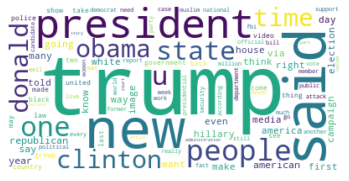

In [73]:
## collocations=False means try to contro the duplicate keyword and counts as 1
# lower max_font_size, change the maximum number of word and lighten the background:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
# Generate a word cloud image
cloud = WordCloud(stopwords=stopwords, # BACK UP
                      background_color="white",
                      collocations=False,
                      max_words=100).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(cloud, interpolation='bilinear') # IM = IMAGE 
plt.axis("off") # NO AXIS
plt.show() # DISPLAY PLOT

# Sentiment Analysis 

In [74]:
data

,text
0,donald trump wish americans happy new year lea...
1,house intelligence committee chairman devin nu...
2,friday revealed former milwaukee sheriff david...
3,christmas day donald trump announced would bac...
4,pope francis used annual christmas day message...
...,...
23476,st century wire says wire reported earlier wee...
23477,st century wire says familiar theme whenever d...
23478,patrick henningsen st century wireremember oba...
23479,st century wire says al jazeera america go his...


In [75]:
data = data.drop_duplicates('text') 
data

,text
0,donald trump wish americans happy new year lea...
1,house intelligence committee chairman devin nu...
2,friday revealed former milwaukee sheriff david...
3,christmas day donald trump announced would bac...
4,pope francis used annual christmas day message...
...,...
22698,st century wire says world stage men women mer...
22699,randy johnson st century wirethe majority main...
22700,tune alternate current radio network acr anoth...
22701,st century wire says new front opened long bat...


In [76]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.


In [77]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob

from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity # polarity range -1 to +1
data['polarity'] = data['text'].apply(pol)
data.head(5)

,text,polarity
0,donald trump wish americans happy new year lea...,0.117708
1,house intelligence committee chairman devin nu...,-0.014112
2,friday revealed former milwaukee sheriff david...,-0.019491
3,christmas day donald trump announced would bac...,0.018391
4,pope francis used annual christmas day message...,-0.000568


In [87]:
data['Sentiment'] = np.where(data['polarity']>= 0, 'Positive', 'Negative')
data.head()

,text,polarity,Sentiment
0,donald trump wish americans happy new year lea...,0.117708,Positive
1,house intelligence committee chairman devin nu...,-0.014112,Negative
2,friday revealed former milwaukee sheriff david...,-0.019491,Negative
3,christmas day donald trump announced would bac...,0.018391,Positive
4,pope francis used annual christmas day message...,-0.000568,Negative


<AxesSubplot:>

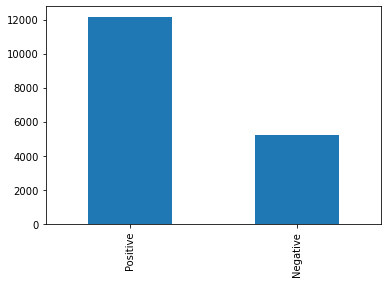

In [88]:
data.Sentiment.value_counts().plot.bar()

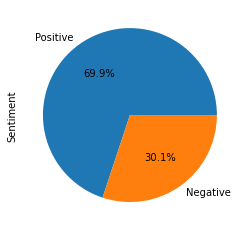

In [89]:
data.Sentiment.value_counts().plot.pie(autopct="%.1f%%");

# Finish
